# Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [ ]:
dataset.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [ ]:
dataset.rename(columns={'Genre': 'Gender', 'Annual_Income_(k$)': 'Annual_Income'}, inplace=True)

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
dataset['Gender_encoded'] = label_encoder.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Gender_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


# Dropping Columns which are not required

In [ ]:
columns_to_drop = ['CustomerID', 'Gender']
dataset.drop(columns=columns_to_drop, inplace=True)

In [ ]:
dataset.head()

,Age,Annual_Income,Spending_Score,Gender_encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dataset['Gender_encoded'] = dataset['Gender_encoded'].astype('int64')

In [ ]:
dataset.dtypes

Age               int64
Annual_Income     int64
Spending_Score    int64
Gender_encoded    int64
dtype: object

In [ ]:
dataset.describe()

,Age,Annual_Income,Spending_Score,Gender_encoded
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [ ]:
dataset.shape

(200, 4)

<Axes: >

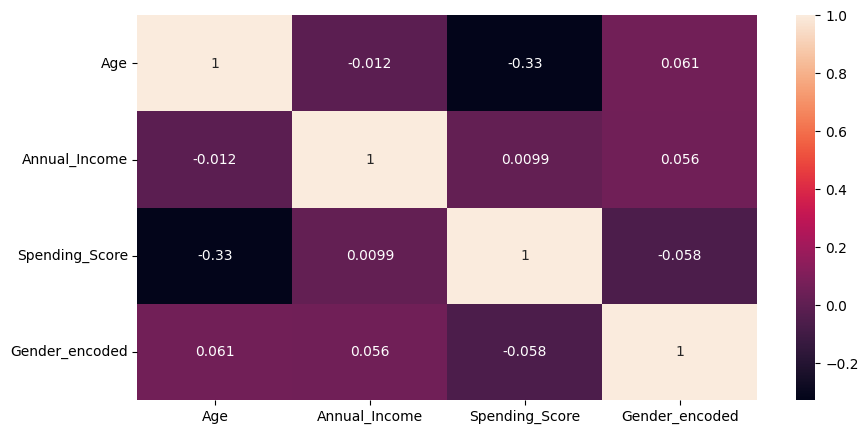

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(),annot = True)

# Box Plot

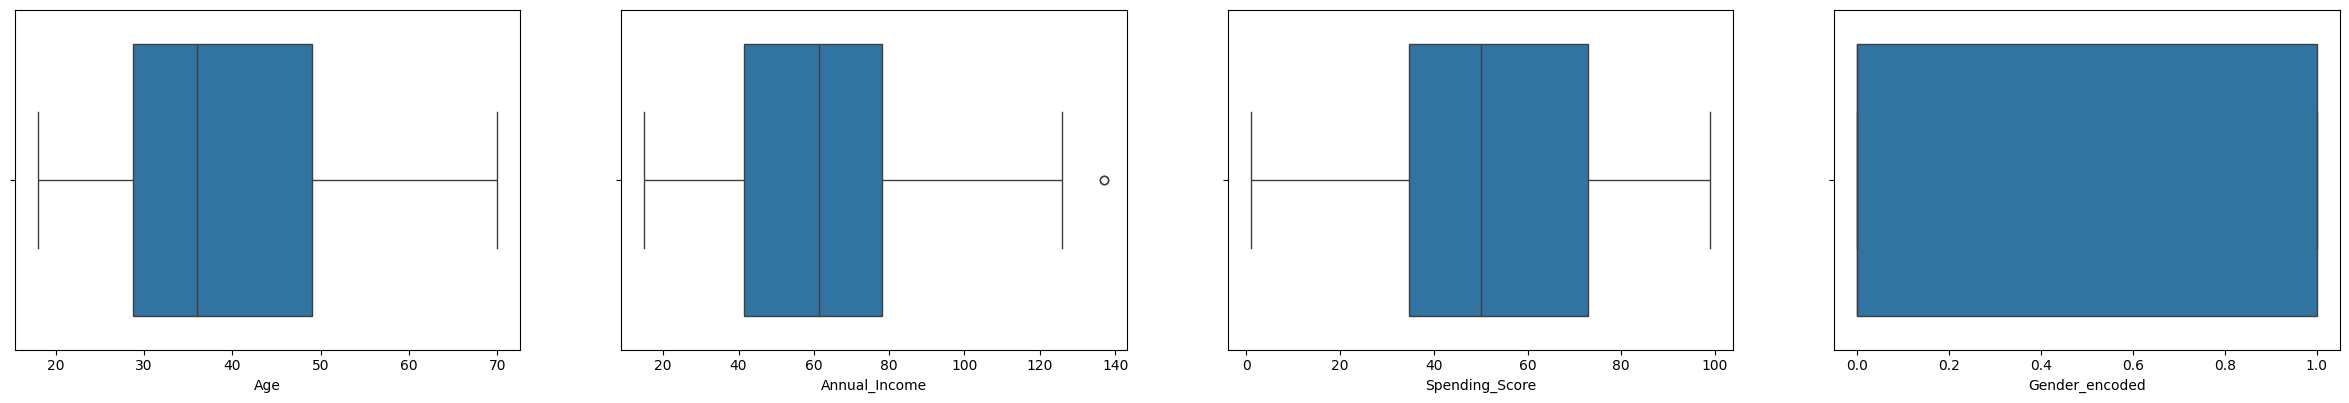

In [ ]:
plt.figure(figsize = (30,15))
m = 1
for i in dataset:
    plt.subplot(3,4,m)
    sns.boxplot(x = dataset[i])
    m += 1

- Ignoring the Gender_Encoded, we can see that rest of the features does not have any outliers. The Annual_Income has one outlier. So it does not impact the traning process much

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(dataset),columns = dataset.columns)

In [ ]:
data.head()

,Age,Annual_Income,Spending_Score,Gender_encoded
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [ ]:
X = data[["Annual_Income", "Spending_Score"]]
X.head()

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
wcss = []
for i in range(1,11):
    kmeans =  KMeans(n_clusters = i, n_init = 'auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[400.00000000000006, 270.8923594673905, 157.7040081503594, 108.92131661364358, 65.56840815571681, 88.7644320017257, 46.870687574897055, 47.6387253698155, 32.421683532347444, 29.061152995353446]


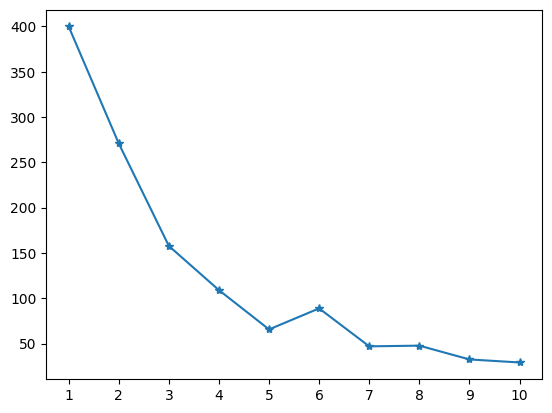

In [ ]:
plt.plot(range(1,11), wcss, marker = '*')
plt.xticks(range(1,11))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

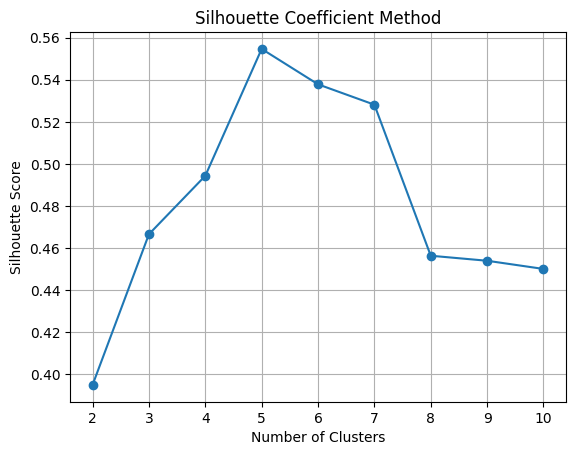

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient Method')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

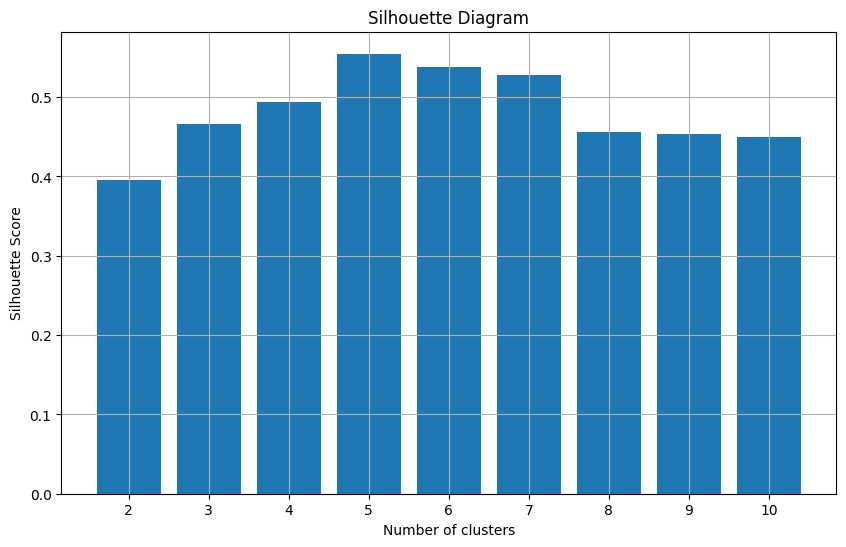

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Diagram')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

# Applying K Means Algorithm

In [ ]:
k_means = KMeans(n_clusters=5, n_init="auto")
k_means.fit(X)
y_pred = k_means.predict(X)
data["label"] = y_pred
data.head()

,Age,Annual_Income,Spending_Score,Gender_encoded,label
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,1
3,-1.137502,-1.700830,1.040418,-0.886405,2
4,-0.563369,-1.662660,-0.395980,-0.886405,1


# Plotting the Result

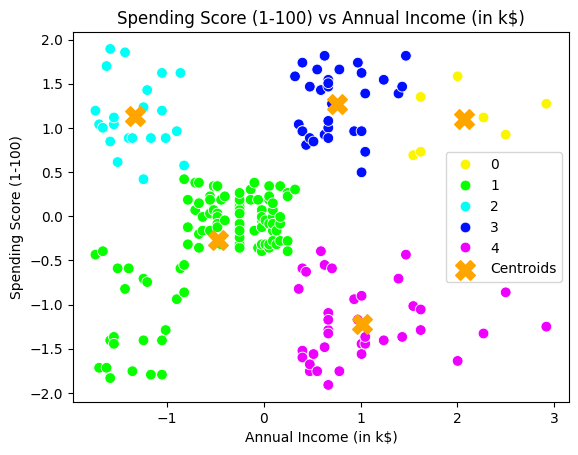

In [ ]:
centroids = k_means.cluster_centers_
colors = sns.color_palette('hsv', n_colors=k_means.n_clusters)
# Plot scatterplot of the clusters
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    hue="label",
    palette=colors,
    legend="full",
    data=data,
    s=60
)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='orange', label='Centroids')

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.legend()
plt.show()

# Week 2

# Gaussian Mixture Model Implementation

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X_GMM = dataset[["Annual_Income", "Spending_Score"]]

In [ ]:
X_GMM

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


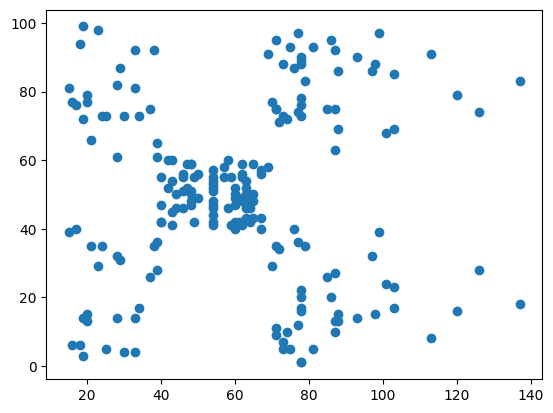

In [ ]:
plt.scatter(X_GMM['Annual_Income'],X_GMM['Spending_Score'])

In [ ]:

X_GMM_Values = X_GMM.values

n_components_range = range(1, 11)


bic_values = []
aic_values = []


for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_GMM_Values)
    bic_values.append(gmm.bic(X_GMM_Values))
    aic_values.append(gmm.aic(X_GMM_Values))

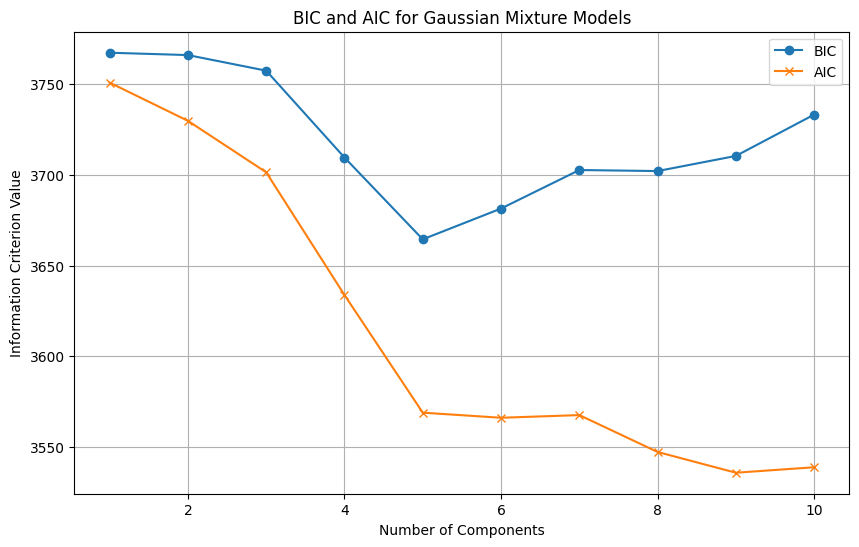

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.plot(n_components_range, aic_values, label='AIC', marker='x')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Models')
plt.legend()
plt.grid(True)
plt.show()

# Gussian Mixture Model with BIC No of Components

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_GMM_Values)
labels = gmm.predict(X_GMM_Values)

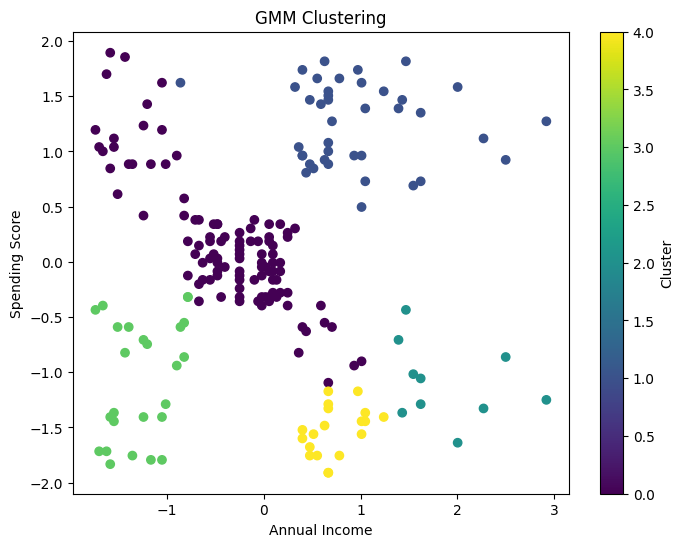

In [ ]:
# Plot the scatter plot with the cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Income'], data['Spending_Score'], c=labels, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Gussian Mixture Model with AIC No of Components

In [ ]:
gmm = GaussianMixture(n_components=9)
gmm.fit(X_GMM_Values)
labels = gmm.predict(X_GMM_Values)

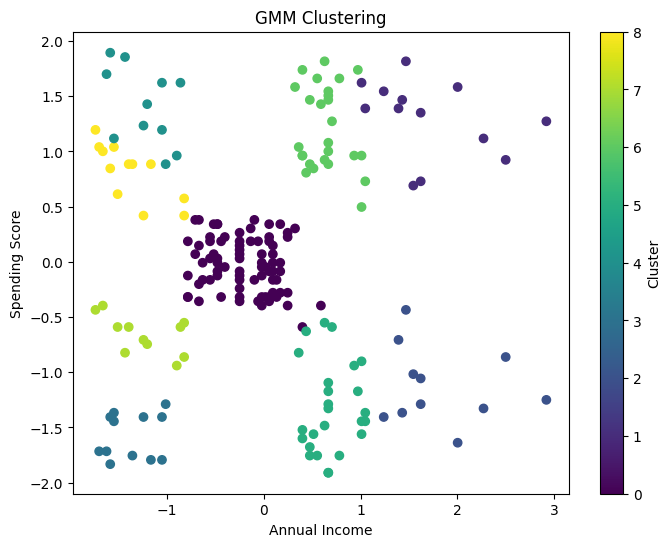

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Income'], data['Spending_Score'], c=labels, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Anomaly detection with Gaussian Mixture Models

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
Scores = gmm.score_samples(X)
threshold = np.percentile(Scores, 5)
anomalies = data[Scores < threshold]

print("Anomalies:")
print(anomalies)

Anomalies:
          Age  Annual_Income  Spending_Score  Gender_encoded  label
0   -1.424569      -1.738999       -0.434801        1.128152      1
4   -0.563369      -1.662660       -0.395980       -0.886405      1
41  -1.065735      -0.861102        1.622741        1.128152      2
184  0.154298       1.467233       -0.434801       -0.886405      4
192 -0.419835       2.001605       -1.638270        1.128152      4
195 -0.276302       2.268791        1.118061       -0.886405      0
196  0.441365       2.497807       -0.861839       -0.886405      4
197 -0.491602       2.497807        0.923953        1.128152      0
198 -0.491602       2.917671       -1.250054        1.128152      4
199 -0.635135       2.917671        1.273347        1.128152      0


**Above are the anomailes detected using the 5th percentile**

# Determine the Optimal Parameters for DBSCAN

In [ ]:
dfdb = dataset[["Annual_Income", "Spending_Score"]]

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

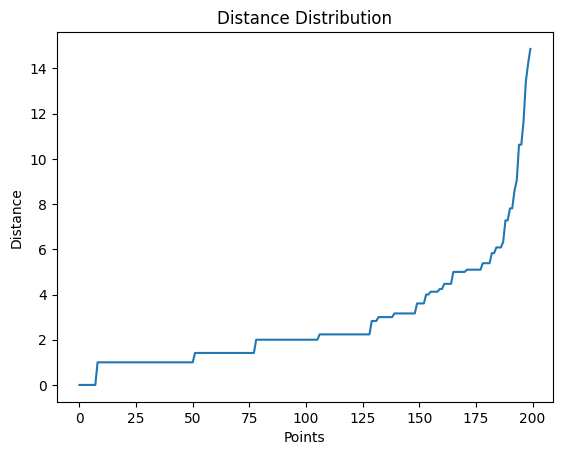

In [ ]:
# Step 1: Calculate pairwise distances
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dfdb)
distances, _ = neighbors_fit.kneighbors(dfdb)
distances = np.sort(distances, axis=0)[:, 1]  # Sort distances and select the second column (nearest neighbor distances)

# Step 2: Plot the sorted distances
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('Distance Distribution')
plt.show()

# Step 3: Identify the "elbow" or significant change in slope
# Step 4: Choose epsilon based on the identified "elbow"
# Step 5: Choose min_samples


In the context of DBSCAN (Density-Based Spatial Clustering of Applications with Noise), the choice of epsilon (ε) and min_samples parameters significantly influences the clustering results. Let's discuss how we arrived at the values of epsilon = 12 and min_samples = 9 based on the provided distance distribution graph and through visual inspection and trial and error.

Epsilon (ε) Selection:
The distance distribution graph illustrates the distances between each point and its nearest neighbor in the dataset. In DBSCAN, epsilon represents the maximum distance within which points are considered neighbors. Here's how we arrived at the value of epsilon = 12:

Observation of Distance Distribution: Upon visual inspection of the distance distribution graph, we notice a significant increase in distance occurring around the 150th point. This suggests that beyond this point, the distances between points start to increase notably.

Selection of Epsilon Value: To capture the dense regions of the dataset while excluding outliers, we choose an epsilon value slightly before the significant increase in distance. In this case, we select epsilon = 12, as it effectively encompasses the dense regions without extending too far into the outlier space.

Min_samples Selection:
The min_samples parameter determines the minimum number of points required to form a dense region or core point. Here's how we arrived at the value of min_samples = 9:

Visual Inspection of Clustering Results: After applying DBSCAN with various min_samples values, we visually inspected the resulting clusters. We observed that min_samples = 9 effectively captured the desired clusters, providing a balance between overfitting (too low min_samples) and underfitting (too high min_samples).

Trial and Error Approach: Through iterative experimentation with different min_samples values, we evaluated the clustering results based on cluster density, coherence, and stability. We found that min_samples = 9 produced clusters that aligned well with our expectations and the inherent structure of the dataset.

By carefully considering the characteristics of the dataset, visually inspecting the distance distribution, and iteratively adjusting the parameters through trial and error, we arrived at the values of epsilon = 12 and min_samples = 9, which yielded meaningful and interpretable clustering results for our project.

# Implement Clustering Techniques for DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

In [ ]:
# Set epsilon and min_samples
epsilon = 12
min_samples = 9

# Initialize DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN clustering to the data
dbscan.fit(dfdb)

# Get cluster labels
cluster_labels = dbscan.labels_

# Convert cluster labels to dataframe
df_clusters = pd.DataFrame({'Cluster': cluster_labels})

# Merge cluster labels with original dataframe
df_result = pd.concat([dfdb, df_clusters], axis=1)

# Display the result
print(df_result)


     Annual_Income  Spending_Score  Cluster
0               15              39       -1
1               15              81        0
2               16               6        1
3               16              77        0
4               17              40       -1
..             ...             ...      ...
195            120              79       -1
196            126              28       -1
197            126              74       -1
198            137              18       -1
199            137              83       -1

[200 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt

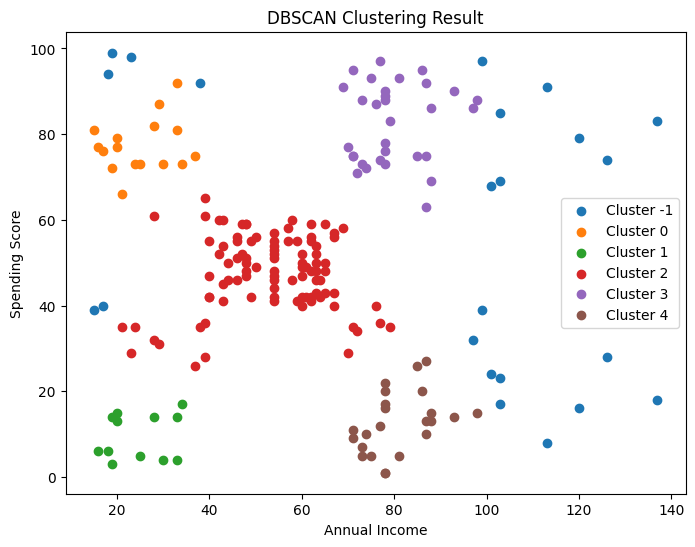

In [ ]:
# Scatter plot colored by cluster labels
plt.figure(figsize=(8, 6))
for cluster_label in df_result['Cluster'].unique():
    cluster_data = df_result[df_result['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering Result')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Isolation Foreset for Anaomaly Detection

In [ ]:
# Select relevant features (e.g., Annual Income and Spending Score)
X = dataset.iloc[:, [1, 2]].values

# # Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
isolation_forest.fit(X)

# Predict outliers
outliers = isolation_forest.predict(X)

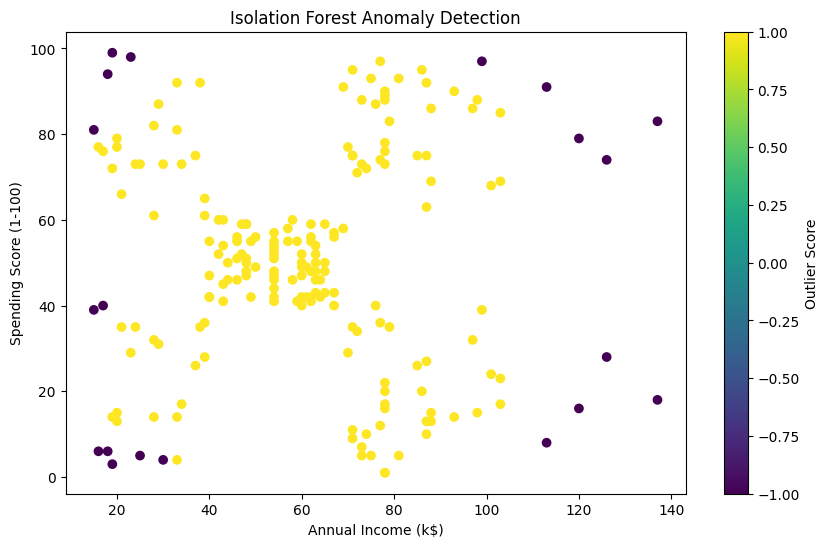

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=outliers, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Isolation Forest Anomaly Detection')
plt.colorbar(label='Outlier Score')
plt.show()

# Explainable AI Techniques

# SHAP - SHapley Additive exPlanations

In [ ]:
dataset.head()

,Age,Annual_Income,Spending_Score,Gender_encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
X_Shap = dataset[['Age', 'Annual_Income', 'Spending_Score', 'Gender_encoded']]

In [ ]:
X_Shap.head()

,Age,Annual_Income,Spending_Score,Gender_encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
import shap

In [ ]:
k_means_Shap = KMeans(n_clusters=5, n_init="auto")
clusters = k_means_Shap.fit_predict(X_Shap)

In [ ]:
explainer = shap.KernelExplainer(k_means_Shap.predict, X_Shap)

In [ ]:
shap_values = explainer.shap_values(X_Shap)

  0%|          | 0/200 [00:00<?, ?it/s]

# SHAP Explanation Force Plots

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_Shap)

# Interpretation
    - The above plot shows features which contributes more for the clustering and which are not
    - The features which contributes more to the clustering are in the Red Colour
    - The features which contributes less to the clustering are in the Blue Colour

In [ ]:
base_value = explainer.expected_value
print("Base Value:", base_value)

Base Value: 1.98


# SHAP Feature Importance

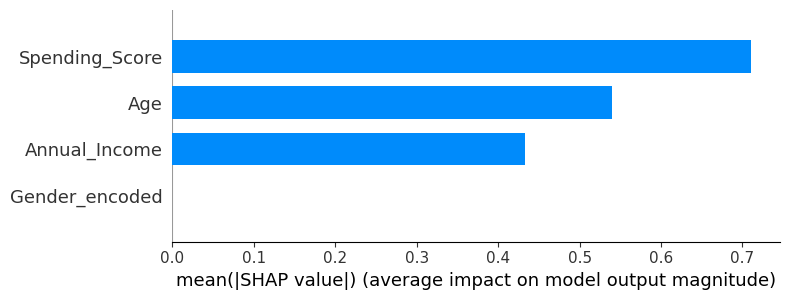

In [ ]:
shap.summary_plot(shap_values, X_Shap, plot_type="bar")

- We can see that Spending Score and Annual Income has more Impact on the cluster formation
- Age has less impact and Gender has no impact on the cluster selection

# SHAP Summary Plot

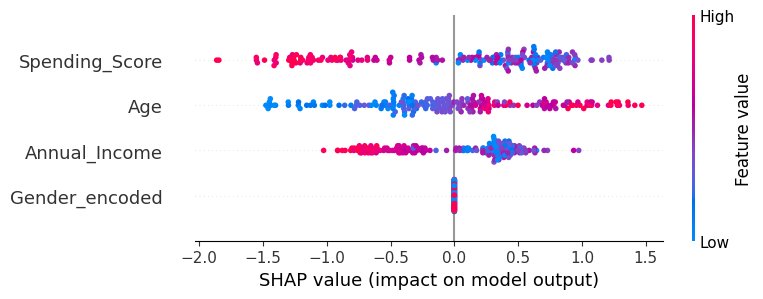

In [ ]:
shap.summary_plot(shap_values, X_Shap)

# SHAP Dependence Plot

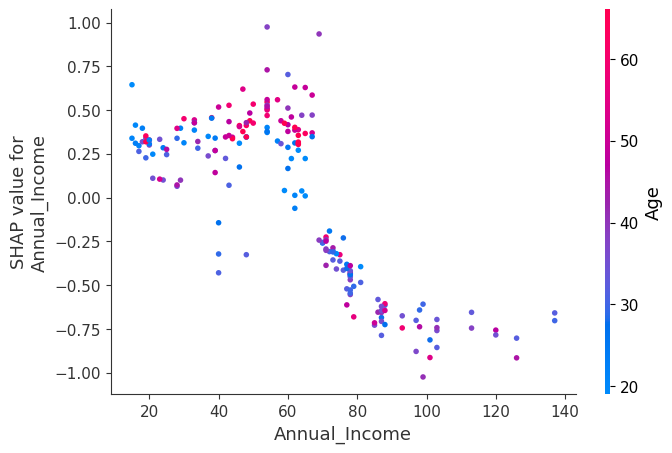

In [ ]:
shap.dependence_plot('Annual_Income',shap_values, X_Shap)

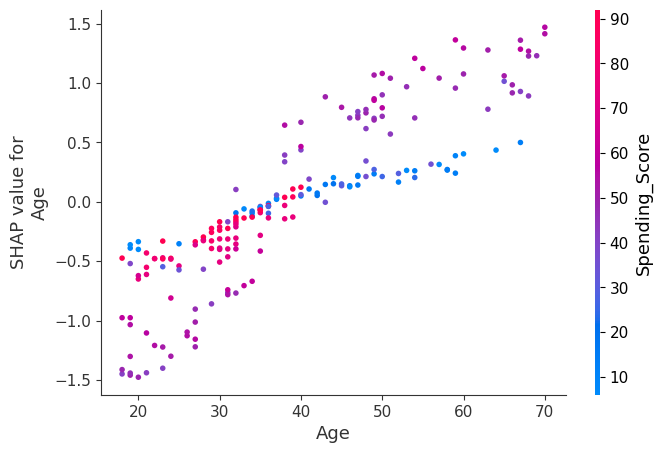

In [ ]:
shap.dependence_plot('Age',shap_values, X_Shap)

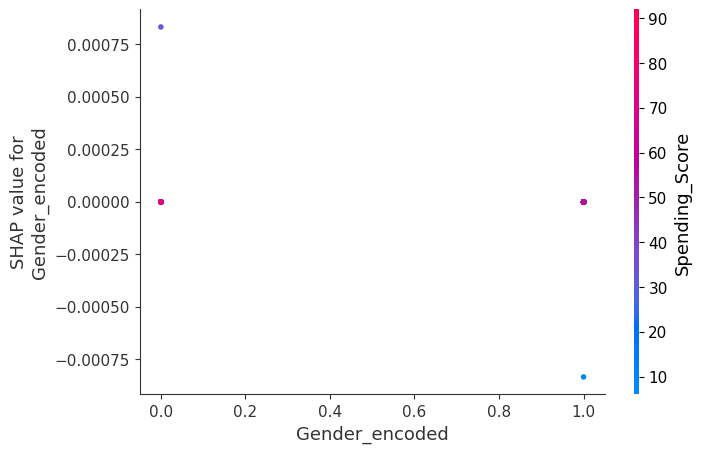

In [ ]:
shap.dependence_plot('Gender_encoded',shap_values, X_Shap)

# Dimensionality Reduction

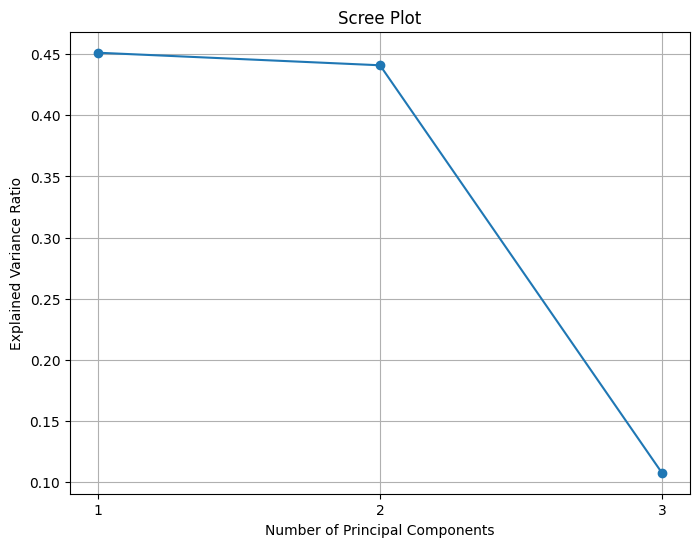

In [ ]:
from sklearn.decomposition import PCA
X = dataset[['Age', 'Annual_Income', 'Spending_Score', 'Gender_encoded']]
# Create a PCA object with 2 components
pca = PCA(n_components=3)

# Fit the PCA object to your dataset
pca.fit(X)

# Transform your dataset into the reduced-dimensional space
X_pca = pca.transform(X)

# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

import matplotlib.pyplot as plt

# Assuming 'pca' is your PCA object
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()



A scree plot is a diagnostic tool used to assess the effectiveness of Principal Component Analysis (PCA) on a dataset. In PCA, principal components are ordered based on the amount of variation they capture: PC1 captures the most variation, PC2 captures the second most, and so on. Each principal component contributes information about the data, and the total number of principal components equals the number of features in the dataset.

In a scree plot, the y-axis represents eigenvalues, which quantify the amount of variation explained by each principal component. The purpose of a scree plot is to aid in selecting the number of principal components to retain. A steep decline in eigenvalues followed by a bend, often referred to as an "elbow," indicates a point where the rate of decrease in eigenvalues slows down. This "elbow" serves as a cutoff point for selecting the principal components to retain. Principal components before the "elbow" are considered to capture significant variation in the data, while those after the "elbow" contribute less to the overall variation and can be discarded without significant loss of information.

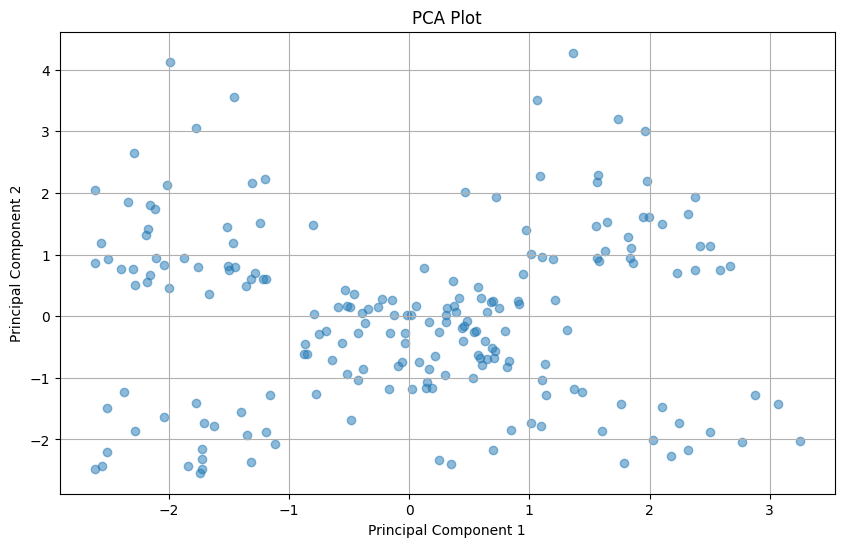

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'dataset' is your DataFrame containing features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


PCA offers several benefits, including:

* Dimensionality reduction: PCA reduces the number of features while preserving the most important information.
* Feature transformation: PCA transforms the original features into a new set of uncorrelated variables (principal components), which can be used for downstream analysis.
* Noise reduction: PCA can help remove noise and redundant information from the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



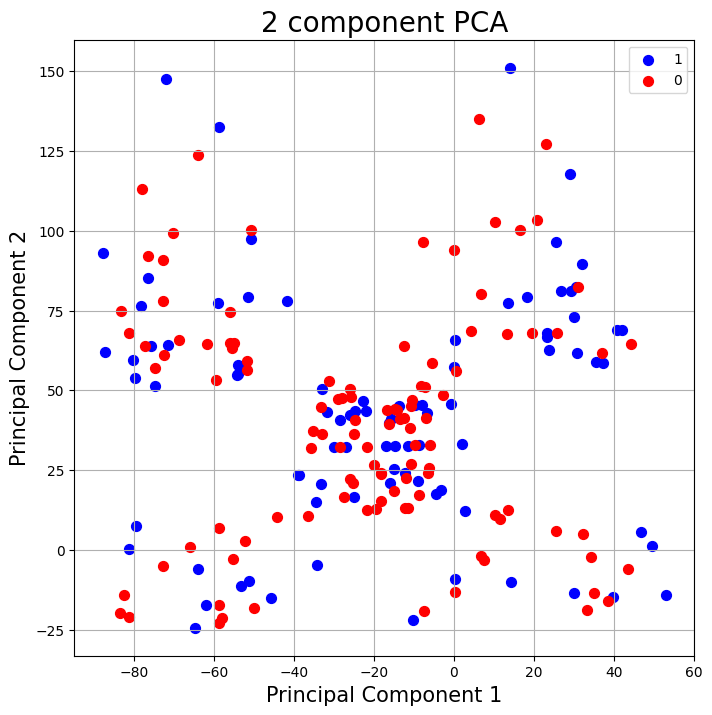

In [ ]:
# Assuming 'pca' is your PCA object

components = pca.transform(dataset)  # Transform your standardized features
dataset['principal component 1'] = components[:, 0]  # Assuming the first component is PC1
dataset['principal component 2'] = components[:, 1]  # Assuming the second component is PC2

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Assuming 'Spending_Score' is the column in 'dataset' that indicates the target or label
targets = dataset['Gender_encoded'].unique()
colors = ['b', 'r']  # Adjust colors as needed

for target, color in zip(targets, colors):
    indicesToKeep = dataset['Gender_encoded'] == target
    ax.scatter(dataset.loc[indicesToKeep, 'principal component 1'],
               dataset.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)

ax.legend(targets)
ax.grid()
plt.show()



In [ ]:
X_subset = dataset[['Age', 'Annual_Income', 'Spending_Score', 'Gender_encoded']]
y_subset = dataset['Gender_encoded']

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

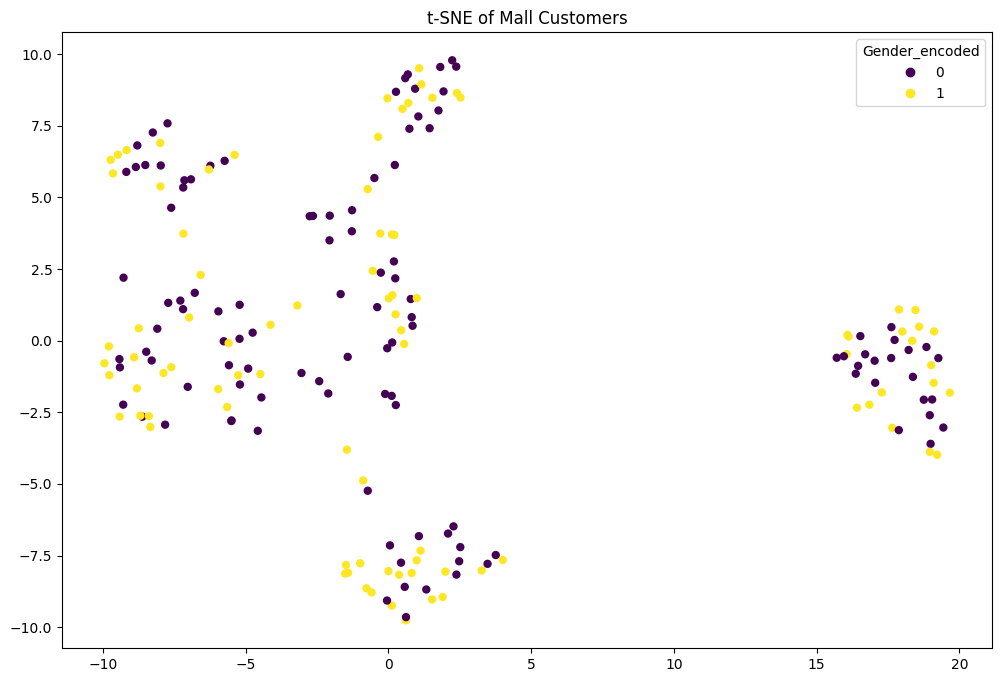

In [101]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='viridis', s=25)
plt.legend(*scatter.legend_elements(), title="Gender_encoded")
plt.title('t-SNE of Mall Customers')
plt.show()


t-Distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique commonly used for visualizing high-dimensional data in a lower-dimensional space. Unlike linear techniques such as PCA, t-SNE focuses on capturing the local structure of the data and is particularly effective at preserving the local relationships between data points.

**LIME :**

In [ ]:
from sklearn.pipeline import make_pipeline
import lime
import lime.lime_tabular

# Load the Mall Customers dataset
data = dataset

# Renaming Columns
dataset.rename({'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, axis = 'columns', inplace = True)

# Assume you have features 'Age', 'Annual Income', and 'Spending Score'
X = data[['Annual_Income', 'Spending_Score']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

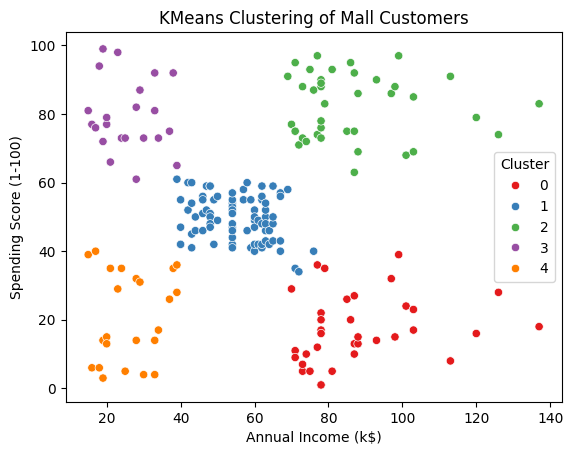

Original data point: [[15. 39.]]


In [ ]:
# Visualize the clusters
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=data, palette='Set1')
plt.title('KMeans Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Explain a data point using LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_scaled, mode='regression')
idx = 0  # Index of the data point you want to explain
exp = explainer.explain_instance(X_scaled[idx], kmeans.predict, num_features=3)

# Rescale the features back to their original units
original_point = scaler.inverse_transform(X_scaled[idx].reshape(1, -1))
print("Original data point:", original_point)

# Print the explanation
exp.show_in_notebook()

**Original Data Point:** The original data point represents a customer with an annual income of 15k and a spending score of 39.

**Predicted Value:** According to LIME, this data point belongs to cluster 4. The predicted value of 4.00 suggests that this customer shares similar characteristics with others in cluster 4, indicating that they are likely to exhibit similar behavior or traits.

**Prediction Breakdown:** LIME provides an explanation of why the model assigned the data point to cluster 4 by analyzing the contributions from each feature.

- **Annual Income (Feature 0):** The annual income of 15k had a contribution of -0.73 to the prediction. This indicates that having a low income significantly decreases the likelihood of belonging to cluster 4.
  
- **Spending Score (Feature 1):** The spending score of 39 had a contribution of 0.24 to the prediction. This suggests that while the spending score positively affects the likelihood of belonging to cluster 4, its impact is relatively lower compared to annual income.

Overall, the breakdown suggests that the model clusters customers based on their annual income, with those having a low income being more likely to be grouped into cluster 4.

**Feature Values:** These represent the scaled values of the features for the given data point. The scaled value of the first feature (annual income) is -1.74, indicating a low annual income. The scaled value of the second feature (spending score) is -0.43, indicating a moderate spending score.

**Feature Contributions:** These demonstrate the impact of each feature on the prediction. For example, the first feature (annual income) contributed -0.73, while the second feature (spending score) contributed 0.24 to the prediction.

In summary, this explanation suggests that the customer's low annual income is more representative of cluster 4, while the spending score plays a less significant role.

**Conclusion:** To sum up, this clarification indicates that the customer's modest yearly earnings are a better indicator of cluster 4, whereas the spending score has a minor impact on this specific forecast.